<span style='color:red;background-color:yellow;font-weight:bold;'>+ could start a notebook called "Financial Markets"</span>
<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>+ exchange-traded vs OTC, especially for derivatives</span>
<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>+ how does the order book work</span>
<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>+ for each asset class: (1) add example event (2) describe construction of the representative index, (3) analysis of index</span>
<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>+ for each asset class: daily volume, market structure</span>
<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>+ for derivatives: compare volume at exchanges w OTC</span>
<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>+ *BORs, RFRs</span>
<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>+  mention NQH2O</span>
<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>+  mention infrastructure as an asset class</span>
<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>+ indexes at https://www.theice.com/market-data/indices</span>

## Sizes at a glance

To compare the sizes of the various types of wealth and financial asset classes, please see<br/>
https://www.visualcapitalist.com/all-of-the-worlds-money-and-markets-in-one-visualization-2020/

## Major asset classes of financial products

### Equities (Stocks)

#### Brief description
A stock (equity investment) is a partial ownership of a commercial entity.

Net income / expenses arise from: (1) change in value of the stock (2) dividends (payments to shareholders) (3) taxes.
<br/>
Here "net" means the sum of the listed items with their respective signs: plus sign for income, minus sign for expense.

#### Major venues and Volume

Let us have a look together at the volumes of the largest stock exchanges at<br/>
https://en.wikipedia.org/wiki/List_of_stock_exchanges#Major_stock_exchanges

#### Example event: IBM 2020-10-08

[Announcement of IBM's spin-off company](https://newsroom.ibm.com/2020-10-08-IBM-To-Accelerate-Hybrid-Cloud-Growth-Strategy-And-Execute-Spin-Off-Of-Market-Leading-Managed-Infrastructure-Services-Unit) --> IBM stock price jumped (image source: Google) ![IBM stock price jumped from Oct 07 to Oct 08](./img/IBM-stock-2020-Oct-05-to-09.PNG "IBM stock price jumped from Oct 07 to Oct 08, 2020")

#### Example index: Standard & Poor's 500
The SP500 is the weighted sum of the 500 largest market cap US stocks, and it is published every 15 seconds.

Please read the `Index objective` section (in the Introduction) of [methodology-sp-us-indices.pdf](./pdf/methodology-sp-us-indices.pdf).

For the `float-adjusted` value (also called: free-float methodology) please read the<br/>
`Introduction` and the `Float adjustment rules` in [methodology-sp-float-adjustment.pdf](./pdf/methodology-sp-float-adjustment.pdf)

Note: The S&P 500 is only one of the several S&P indices.


###### Selection criteria
Please see again [methodology-sp-us-indices.pdf](./pdf/methodology-sp-us-indices.pdf) :
1. Market capitalization threshold based on float-adjusted capitalization.<br/>
2. US company stock traded on one or more major US exchanges.
3. Investable Weight Factor, Viability, Liquidity, and Exceptions


###### Calculation details

The S&P 500 index is a ratio.
1. The enumerator is the sum (over the selected stocks) of the number of liquid shares * value of single share.
2. The denominator ensures that the index is continuous in time (stock additions/deletions, company actions).

For details let us have a look together at &nbsp; [methodology-index-math.pdf](./pdf/methodology-index-math.pdf) .

#### Task: Weight distribution of SP500 at two time points

###### How to download the data

1. Go go https://web.archive.org/web/*/https://www.slickcharts.com/sp500 
2. Select two snapshots, for example, the [Feb/25 2012 05:06:08 snapshot](https://web.archive.org/web/20120225050608/https://www.slickcharts.com/sp500) and the [Oct/03 2020 18:00:55 snapshot](https://web.archive.org/web/20201003180055/https://www.slickcharts.com/sp500).
3. For both snapshots, first copy-paste the html tables of weights into Excel, then edit with Excel to have only the weight in each line,<br/>and finally, save the list of weights to a txt file: `SP500-weights-2012-02-25.txt` and `SP500-weights-2020-10-03.txt`.

###### Tasks

1. List the first ten stocks in both cases.
2. Count how many companies have split stocks in the two cases, for example Alphabet A and C.
3. What is common in the two (three) stocks that are the upper outliers in the 2020-10-03 data set ? 

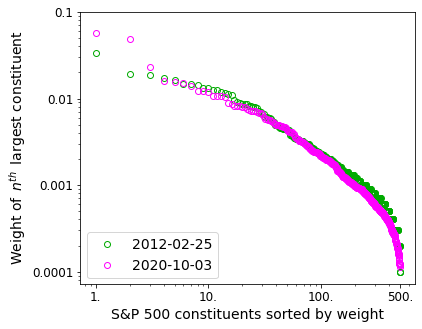

In [1]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

DATA_DIR = 'data'
FIRST_DATE = '2012-02-25'
SECOND_DATE = '2020-10-03'
FONTSIZE = 14
TICKS_FONTSIZE = 12
COLORS = '#00aa00', 'magenta'
XTICS, YTICS = [1, 10, 100, 500], [1e-4, 0.001, 0.01, 0.1]


def compare_sp500_weights(first_date=None, second_date=None, xtics=None, ytics=None, colors=None):
    """Compare the distribution of S&P500 weights at two time points.
       It is assumed that the data files are available.
       Read only first 500 items, even if SP500 contains more than 500 weights."""
    
    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

    plt.xscale('log')
    plt.yscale('log')
    for current_date, color in zip((first_date, second_date), colors):
        with open(join(DATA_DIR, 'SP500-weights-' + current_date + '.txt')) as f:
            weights = np.array([float(_) for _ in f.read().splitlines()[:500]])
            plt.plot(weights, marker='o', linewidth=0, color=color,
                     markerfacecolor='none', markeredgecolor=color, label=current_date)
            
    plt.legend(bbox_to_anchor=(0.02, 0.02), loc=3, borderaxespad=0., fontsize=FONTSIZE)
    plt.xticks(xtics, [str(_) + '.' for _ in xtics])
    plt.yticks(ytics, [str(_) for _ in ytics])

    plt.xlabel('S&P 500 constituents sorted by weight', fontsize=FONTSIZE)
    plt.ylabel('Weight of $\,n^{th}\,$ largest constituent', fontsize=FONTSIZE)

    fig = plt.gcf()
    fig.set_size_inches([6, 5])
    plt.show()

    
compare_sp500_weights(first_date=FIRST_DATE, second_date=SECOND_DATE, xtics=XTICS, ytics=YTICS, colors=COLORS)

### Fixed income (mainly Bonds)

#### Brief description

A `bond` is a debt instrument.
The bond market is also called the [credit market](https://www.investopedia.com/terms/c/credit_market.asp).

<br/>
The investor pays an initial sum at the start, receives interest on it usually every 6 months,<br/>
and receives also the initial payment (the capital) at maturity.

Let us read together a description of bonds at<br/>
https://www.investor.gov/introduction-investing/investing-basics/investment-products/bonds-or-fixed-income-products/bonds

`Mortgage-Backed Securities` (MBS) are a type of debt security.
<br/>
A bank providing loans sells the loans' capitals and fixed interests bundled to investors.
<br/>
Please watch the video at https://www.investopedia.com/terms/m/mbs.asp .
<br/>
Note: an MBS is only as good as our knowledge of the underlying loans.

#### Volume and Instrument types

US Fixed Income trading volume at https://www.sifma.org/resources/research/fixed-income-chart , see also https://www.sifma.org/about

International: https://stats.bis.org/statx/srs/table/c1 , see also https://www.bis.org/about

Please read the following to compare bonds to stocks:<br/>
https://www.investopedia.com/ask/answers/09/bond-over-the-counter.asp

#### Example event: US 10y Const Mat Rate 2020-March

The US 10Y Constant Maturity Rate dropped in March 2020: https://fred.stlouisfed.org/series/DGS10

#### Example index: VBMFX (Vanguard Total Bond Market Index)

Let us read these together:
<br/>
1, The `Product summary` at https://investor.vanguard.com/mutual-funds/profile/overview/vbmfx
<br/>
2, The `Plain talk about risk` at https://investor.vanguard.com/mutual-funds/profile/portfolio/vbmfx

#### Task: Tranche income and its volatility from uncorrelated payments

Please watch the 1-minute video at https://www.investopedia.com/terms/t/tranches.asp.


Next month you will have a `very large number` ($\,N\,$) of incoming `small payments`.
<br/>
The $i$. payment will be 1 with probability $\,p_i\,$ and 0 with probability $\,1-p_i\,$.
<br/>
The payments are `uncorrelated` and the $\,p_i\,$ values are `evenly distributed` in $\,\left(\,0\,,\,1\,\right)\,$.

What will be the
<br/>
(A) expected value ($\,E\,$) and volatility ($\,\sigma\,$) of your income ?
<br/>
(B) $\,E\,$ and $\,\sigma\,$ of payments that have $\,p_i\,$ values between two fixed $\,p_{\,1} < p_{\,2}\,$ numbers ?
<br/>
(C) $\,E\,$ and $\,\sigma\,$ of the payments with the following ten pairs of $\,p_{\,1}\,$ and $\,p_{\,2}\,$ values ?
<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\,p_{\,1}=0.9\,,\,p_{\,2}=1\,\,\,$ (top tranche) , 
<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\,\dots\,$
<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\,p_{\,1}=0\,,\,p_{\,2}=0.1\,\,\,$ (lowest quality tranche) .

###### Answers

(A) 

The expected income of the entire portfolio is $\,\displaystyle{E_{\,\mathrm{ALL}}=N\int_0^1\!\!\!dp\,\,p  = \frac{N}{2}} \,$.
<br/>
The standard deviation of the entire income is 
<br/>
$\,\displaystyle{\sigma_{\,\mathrm{ALL}}=
\sqrt{N\!\int_0^1\!\!\!dp\,\,\,p\,\left(\,1-1\,\mathit{/}\,2\,\right)^{\,2}+\left(\,1-p\,\right)\,\left(\,0-1\,\mathit{/}\,2\,\right)^{\,2}\,} = \frac{\sqrt{N\,}}{2}
} \,$.

<br/>

(B)

The number of such payments is $\,n=N\,\left(\,p_{\,2}-p_{\,1}\,\right)\,$.
<br/>
The expected income is 
$\,\displaystyle{E=n\int_{p_{\,1}}^{p_{\,2}}\!\!dp\,\,p  = 
\frac{n\,\left(\,p_{\,1}+p_{\,2}\,\right)}{2} =
E_{\,\mathrm{ALL}} \,\cdot\, \left(\,p_{\,2}^{\,2}-p_{\,1}^{\,2}\,\right)\,
} \,$.
<br/>
The standard deviation of the income from the $\,\left(\,p_{\,1},\,p_{\,2}\,\right)\,$ tranche is
<br/>
$\,\displaystyle{\sigma=
\sqrt{n\int_{p_{\,1}}^{p_{\,2}}\!\!\!dp\,\,\,p\,\left(\,1-\frac{p_{\,1}+p_{\,2}}{2}\,\right)^2 +
\left(\,1-p\,\right)\,\left(\,0-\frac{p_{\,1}+p_{\,2}}{2}\,\right)^2\,} 
= 
\sigma_{\,\mathrm{ALL}}\,\cdot\,\sqrt{\left(\,p_{\,2}^{\,2}-p_{\,1}^{\,2}\,\right)\,\left(\,1-\frac{p_{\,1}+p_{\,2}}{2}\,\right)\,} 
}\,$

<br/>

(C)

For the 10 tranches mentioned above the expected income and the volatility of the income are the following.

**Conclusions**

According to the above simple model

* volatility is highest in the tranches that have a payment probability around $1\,\mathit{/}\,2\,$.

* overestimating the quality of a good tranche not only overestimates the income, but also underestimates risk.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ROUND_TO_DIGITS = 3


def simple_tranches_E_and_sigma():
    """Expected next income and volatility of the income from a list of simplified tranches."""
    E_per_E_0 = []
    sigma_per_sigma_0 = []
    for p1 in np.arange(0, 1, 0.1):
        p2 = p1 + 0.1
        E_per_E_0.append(np.square(p2) - np.square(p1))
        sigma_per_sigma_0.append(np.sqrt((np.square(p2) - np.square(p1)) * (1.0 - 0.5 * (p1 + p2))))

    tranches = pd.DataFrame()
    tranches['$p_1$'] = pd.Series(data=np.arange(0, 1, 0.1))
    tranches['$p_2$'] = pd.Series(data=np.arange(0, 1, 0.1) + 0.1)
    tranches['E / $E_{\,0}$'] = pd.Series(data=np.round(E_per_E_0, ROUND_TO_DIGITS))
    tranches['$\sigma$ / $\sigma_{\,0}$'] = pd.Series(data=np.round(sigma_per_sigma_0, ROUND_TO_DIGITS))
    tranches.index += 1  # start tranche indexes from 1
    tranches.index.name = 'Tranche'

    return tranches


display(simple_tranches_E_and_sigma())

,$p_1$,$p_2$,"E / $E_{\,0}$","$\sigma$ / $\sigma_{\,0}$"
Tranche,,,,
1,0.0,0.1,0.01,0.097
2,0.1,0.2,0.03,0.160
3,0.2,0.3,0.05,0.194
4,0.3,0.4,0.07,0.213
5,0.4,0.5,0.09,0.222
6,0.5,0.6,0.11,0.222
7,0.6,0.7,0.13,0.213
8,0.7,0.8,0.15,0.194
9,0.8,0.9,0.17,0.160


### FX (Foreign Exchange)
- The FX market is liquid and has the largest volume of all asset classes
- It has no major venue, it is done mostly through intermediaries
- FX trading happens 24 / 7

#### Brief description
Let us watch together and discuss the short video at https://www.investopedia.com/terms/f/forex.asp

#### Volumes

1. Please register at quandl.
2. Have a look at https://www.quandl.com/databases/CLSRV/documentation.<br/>
Note (a) the definition of a business day, (b) HUF is included (by EURHUF and USDHUF).
3. From https://www.quandl.com/databases/CLSRV/documentation?anchor=sample-data<br/>
please download the sample data to the file `IDHD.json` to the `data` subdirectory of the current directory.
4. Plot the daily volume for a few selected currency pairs.

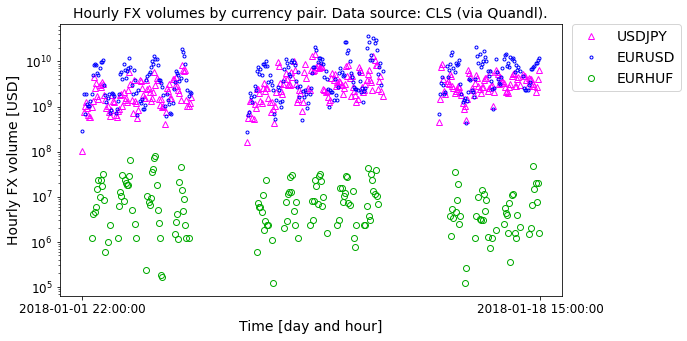

In [3]:
import matplotlib.pyplot as plt
from os.path import join
from json import load
import pandas as pd

DATA_FILE = join('data', 'IDHD.json')
CURRENCY_PAIRS = ['USDJPY', 'EURUSD', 'EURHUF']
FONTSIZE = 14
TICKS_FONTSIZE = 12
COLORS = 'magenta', 'blue', '#00aa00'
MARKERS = '^', '.', 'o'


def extract_currency_pair_fx_volumes():
    """
    Extract fx volumes by currency pairs from the input file 
    """
    df = pd.DataFrame()
    with open(DATA_FILE, 'r') as f:

        # read data
        js = load(f)
        column_names = [column_description['name'] for column_description in js['datatable']['columns']]
        values = {column_name: [] for column_name in column_names}
        for row in js['datatable']['data']:
            for column_name, value in zip(column_names, row):
                values[column_name].append(value)
        for column_name in column_names:
            df[column_name] = pd.Series(values[column_name])

        # transform
        df['datetime'] = pd.Series([pd.to_datetime(day) +  pd.DateOffset(hours=hour)
                                    for (day, hour) in zip(df['london_date'], df['hour'])])
        df = df[['datetime', 'currency', 'volume']]
        df = df.pivot(index='datetime', columns='currency', values=['volume'])
        df.columns = df.columns.get_level_values(level=1)
        
    return df


def plot_fx_hourly_volumes(df=None, currency_pairs=None, colors=None, markers=None):
    """
    Plot hourly USD volumes of FX currency pairs
    """
    plt.title('Hourly FX volumes by currency pair. Data source: CLS (via Quandl).', fontsize=FONTSIZE)
    plt.xlabel('Time [day and hour]', fontsize=FONTSIZE)
    plt.ylabel('Hourly FX volume [USD]', fontsize=FONTSIZE)
    
    for currency_pair, color, marker in zip(currency_pairs, colors, markers):
        plt.plot(df[currency_pair], marker=marker, linewidth=0, color=color,
                 markerfacecolor='none', markeredgecolor=color, label=currency_pair)
            
    plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0., fontsize=FONTSIZE)
    xtics = df.index[0], df.index[-1]
    plt.xticks(xtics, [str(_) for _ in xtics])
    plt.yscale('log')

    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)
    
    fig = plt.gcf()
    fig.set_size_inches([9, 5])
    plt.show()
    

df = extract_currency_pair_fx_volumes()
plot_fx_hourly_volumes(df=df, currency_pairs=CURRENCY_PAIRS, colors=COLORS, markers=MARKERS)

#### Cryptocurrency FX volumes at Bitfinex

For comparison, please have a look at the daily aggregated volumes displayed on the opening page of [bitfinex.com](http://bitfinex.com).

#### Example event: Swiss Franc 2015-01-15

* To feel the surprise, please watch patiently [this 1min 45sec video](https://www.youtube.com/watch?v=vbzw_zgQTbc)


* Read this [Reuters news item](https://www.reuters.com/article/us-markets-franc/swiss-franc-jumps-30-percent-after-swiss-national-bank-dumps-euro-ceiling-idUSKBN0KO16Y20150115)


* Read an [broad analysis at Investopedia](https://www.investopedia.com/articles/forex/033115/why-swiss-franc-so-strong.asp)

#### Example index: US Dollar Index

The USD Index is a weighted average of the exchange rates of the USD to selected other currencies.<br/>
Let's see together [the detailed description at ICE](https://www.theice.com/publicdocs/futures_us/ICE_Dollar_Index_FAQ.pdf). 
Note: ICE is the abbreviation of [Intercontinental Exchange](https://en.wikipedia.org/wiki/Intercontinental_Exchange).

#### Task: Volatility of BTHUSD and ETHUSD

Please download from https://www.kaggle.com/tencars/392-crypto-currency-pairs-at-minute-resolution<br/>
the data files `btcusd.csv.zip` and `ethusd.csv.zip` to the data subfolder of the current directory.

Separate data processing from reading to avoid reading the data again while testing the data processing.

Compare the monthly volatilities to the events affecting the two cryptocurrencies. 

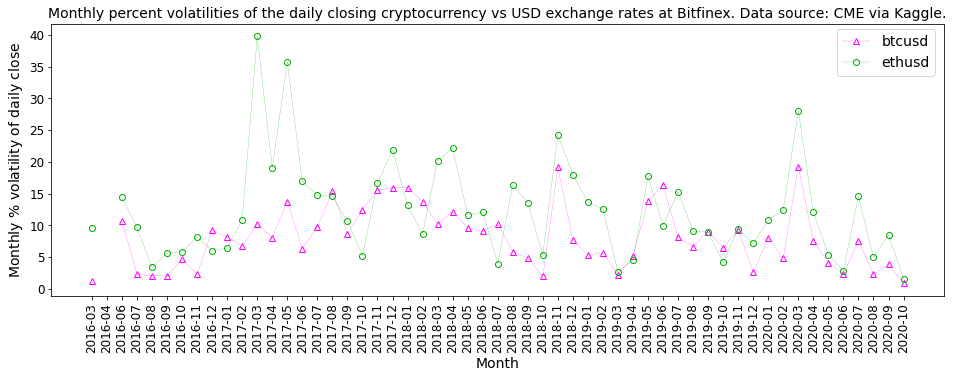

In [4]:
from matplotlib import pyplot as plt
import datetime
import pandas as pd
import numpy as np
import os
from copy import deepcopy

DATA_DIR = 'data'
FX_PAIRS = ['btcusd', 'ethusd']
FONTSIZE = 14
TICKS_FONTSIZE = 12
COLORS = 'magenta','#00aa00'
MARKERS = '^', 'o'


def read_merge_crypto_data(pairs=None):
    """
    Read crypto data for requested pairs and merge them into a single dataframe
    pairs: list of cryptocurrency pairs
    fx: fx data
    fxm: fx merged data
    """
    def _column_name_mapping(columns, tag, no_tag_columns):
        """Prepend prefix tag to all column names except the "no_tag_columns" column names."""
        return {col: col if col in no_tag_columns else tag + '_' + col for col in columns}
    
    fx = {pair: pd.read_csv(os.path.join(DATA_DIR, pair + '.csv.zip')) for pair in pairs}
    for pair, df in fx.items():
        df.rename(columns = _column_name_mapping(df.columns, pair, ['time']), inplace=True)
    fxm = deepcopy(fx[pairs[0]])
    for pair_index, pair in enumerate(pairs):
        if pair_index > 0:
            fxm = fxm.merge(fx[pair], on='time')
            
    return fxm


def plot_monthly_crypto_vols(fxm_orig=None, fx_pairs=None, colors=None, markers=None):
    """
    Calculate and plot the monthly volatilities of daily close crypto vs USD rates
    fxm: fx merged data for one or more (crypto)currency pairs
    """
    fxm = deepcopy(fxm_orig)
    fxm['day'] = pd.Series([datetime.datetime.fromtimestamp(t//1000).strftime('%Y-%m-%d') 
                            for t in fxm['time'].to_numpy()])
    fxm['month'] = pd.Series([datetime.datetime.fromtimestamp(t//1000).strftime('%Y-%m') 
                              for t in fxm['time'].to_numpy()])
    remove_columns = [c for c in fxm.columns if c != 'day' and c != 'month' and c != 'time' and 'close' not in c]
    fxm.drop(remove_columns, axis=1, inplace=True)
    daily_close = fxm.loc[fxm.groupby(['day']).time.idxmax()]
    daily_close.drop(['time'], axis=1, inplace=True)
    percent_vols = 100.0 * daily_close.groupby(['month']).std() / daily_close.groupby(['month']).mean()
    
    plt.title(('Monthly percent volatilities of the daily closing cryptocurrency vs USD exchange rates at Bitfinex. '
               'Data source: CME via Kaggle.'), fontsize=FONTSIZE)
    plt.xticks(range(len(percent_vols.index)), [percent_vols.index[i] for i in range(len(percent_vols.index))], 
               rotation='vertical')
    plt.xlabel('Month', fontsize=FONTSIZE)
    plt.ylabel('Monthly $\%$ volatility of daily close', fontsize=FONTSIZE)
    
    for fx_pair, color, marker in zip(fx_pairs, colors, markers):
        plt.plot(percent_vols[fx_pair + '_close'], marker=marker, linewidth=0.2, color=color,
                 markerfacecolor='none', markeredgecolor=color, label=fx_pair, markersize=6)

    plt.legend(bbox_to_anchor=(0.99, 0.98), loc=1, borderaxespad=0., fontsize=FONTSIZE)
    plt.yscale('linear')

    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)
    
    fig = plt.gcf()
    fig.set_size_inches([16, 5])
    plt.show()


fxm = read_merge_crypto_data(pairs=FX_PAIRS)
plot_monthly_crypto_vols(fxm_orig=fxm, fx_pairs=FX_PAIRS, colors=COLORS, markers=MARKERS)

### Commodities

#### Brief description

Commodities mainly coincide with consumables, in other words, things that are depleted upon use.

Please read the first two sections ("What are Commodities?" and "Why Invest in Commodities?") at<br/>
https://global.pimco.com/en-gbl/resources/education/understanding-commodities

The following are the major [types of commodities](https://medium.com/@comdexofficial/commodity-trading-backbone-of-the-global-economy-131c78f12989):
* Energy Commodities (Crude Oil, Heating Oil, Gasoline Coal, Electricity, etc)
* Metal Commodities (Aluminum, Copper, Gold, Silver, Platinum, Steel, etc)
* Agriculture Commodities (Barley, Cocoa, Corn, Cotton, Wheat, Sugar, etc)
* Livestock and Meat Commodities (Feeder Cattle, Live cattle, Pork Belly, Lean hogs, etc)

#### Volumes

###### VIsual comparison

Please compare the volumes of the oil and metal markets at<br/>
https://www.visualcapitalist.com/size-oil-market/

###### CME Group detailed data, includes derivatives

Let's talk about detailed data by commodities sub-classes from the CME Group, for example, the agricultural section:<br/>
https://www.cmegroup.com/market-data/volume-open-interest/agriculture-commodities-volume.html

#### Example event: Shale revolution

In the 2010s the US increased its oil and gas production, and became a net exporter of crude oil and natural gas.

Please read this article for details: https://www.bloomberg.com/quicktake/fracking

#### Example indexes

###### S&P GSCI (originally Goldman Sachs Commodity Index)

* launched in 1991
* focused on liquid assets, global production and stability

For a detailed description of commodity indexes until 2010, please see 
[Dunsby and Nelson (pdf)](pdf/Dunsby%20and%20Nelson%2C%202010%2C%20A%20brief%20history%20of%20commodity%20indexes%2C%20Journal%20of%20Indexes.pdf)

###### An informal index: Gold / Oil ratio

https://www.visualcapitalist.com/the-gold-oil-ratio-160-years/

#### Task: Compare oil price chart to marco events

Let us discuss the history of oil prices based on the following two sources:
* [History of Oil Prices (Investopedia)](https://www.investopedia.com/history-of-oil-prices-4842834)

* [Crude Oil Prices - 70 Year Historical Chart](https://www.macrotrends.net/1369/crude-oil-price-history-chart)

### Real Estate

#### Brief description

Real estate is land and buildings, above the ground and below.

A more detailed grouping of real estate properties is 
(1) residential, (2) commerical, (3) industrial real estate and (4) land.

Please see the section titled ["Four Types of Real Estate" at this page](
https://www.thebalance.com/real-estate-what-it-is-and-how-it-works-3305882).

#### Example related event: Subprime mortgage crisis

Please read the paragraph titled "Understanding the Subprime Meltdown" at<br/>
https://www.investopedia.com/terms/s/subprime-meltdown.asp

#### Task: Residential property net taxable value vs land value

Plot the net value vs land value of residential properties in Atlantic county (New Jersey, US) in 2009 and 2020.

###### Download data
Download Atlantic county's data from 2009 and 2020 at https://www.nj.gov/treasury/taxation/lpt/TaxListSearchPublicWebpage.shtml

Save the two downloaded zip files in the `data` subfolder of the current folder.

Please see "47. LAND VALUE" and "49. NET TAXABLE VALUE" in the data format description at<br/>
https://www.nj.gov/treasury/taxation/lpt/MODIV-Counties/2020/MODIVLayout2020.pdf

###### Conclusion based on the plot below

1. The ratio of net taxable value to land value decreases with growing land value of the residential property.
2. For large value properties, this ratio grew from 2009 to 2020.

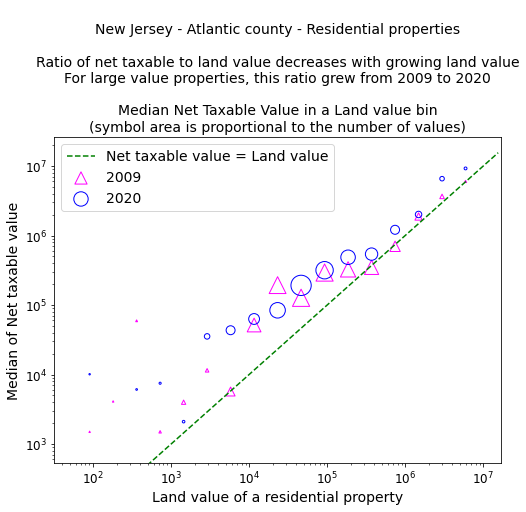

In [5]:
import zipfile
from os.path import join
import io
import numpy as np
from collections import OrderedDict

DATA_DIR = 'data'
FILE_INFOS = [{'year': 2009, 'archive_name': join(DATA_DIR, 'Atlantic.zip'), 'file_name': 'Atlantic.txt'},
              {'year': 2020, 'archive_name': join(DATA_DIR, 'Atlantic_2020.zip'), 'file_name': 'Atlantic20.txt'}]
RESIDENTIAL_PROPERTY_CLASS = '2'
BIN_END_POINT_RATIO = 2.0
DISPLAY_MARGIN_RATIO = np.power(BIN_END_POINT_RATIO, 1.5)  # margin width at the side of the displayed log-log image
PLOT_YEARS = [f['year'] for f in FILE_INFOS]
FONTSIZE = 14
PLOT_COLORS = 'magenta', 'blue'
LINE_COLOR = 'green'
SYMBOL_SIZE = 2.0
PLOT_SIZE = 8, 6
PLOT_SYMBOLS = '^', 'o'


def read_zip_nj_county_residential_land_net_values(zipArchive, txtFileInArchive):
    """
    From a zip file read NJ county residential property land values and net values
    """

    assert zipfile.is_zipfile(zipArchive), 'Please provide the name of a zip file instead of \"{}\"'.format(zipArchive)

    values = []
    with zipfile.ZipFile(zipArchive) as zf:
        with io.TextIOWrapper(zf.open(txtFileInArchive)) as f:
            for line in f.readlines():
                property_class = line[56:58].lstrip('0').rstrip(' ').rstrip('\t')
                if property_class == RESIDENTIAL_PROPERTY_CLASS:
                    land_value = line[421:429].lstrip('0')
                    net_value = line[439:447].lstrip('0')
                    if 0 < len(land_value) and 0 < len(net_value):
                        values.append({'land': int(land_value), 'net': int(net_value)})

    return values


def plot_binned_avg_land_values_net_values():
    """
    Plot net value vs land value
    
    In the calculation part for each land_value - net_value pair:
    find the i index of the bin of the land_value and put the median net_value / land_value ratio into this bin

    r = BIN_END_POINT_RATIO: ratio of the two end points of a bin
    the (i)th bin is [ r^i, r^(i+1) )
    s[i]: list of net_values in the bin that has the index i
    x[i]: geometric mean of the bin's end points: r^(.5+i)
    y[i]: average of those net_values for which the land_value is in the (i)th bin
    """

    # read data, and process it for plotting
    plot_dat = OrderedDict()
    for file_info in FILE_INFOS:
        values = read_zip_nj_county_residential_land_net_values(file_info['archive_name'], file_info['file_name'])

        s = dict()
        for v in values:
            land_value, net_value = v['land'], v['net']
            i = int(np.log(land_value) / np.log(BIN_END_POINT_RATIO))  # index of the log bin where land_value falls
            if i not in s:
                s[i] = list()
            s[i].append(net_value)

        x = [np.power(BIN_END_POINT_RATIO, 0.5 + i) for i in sorted(s)]
        y = [s[i][int(np.floor(0.5 * len(s[i])))] for i in sorted(s)]  # median of s values

        plot_dat[file_info['year']] = {'x': x, 'y': y, 'n': [len(s[i]) for i in sorted(s)]}
        
    # plotting
    fig, ax = plt.subplots(figsize=PLOT_SIZE)
    land_value_min = min([min(plot_dat[year]['x']) for year in PLOT_YEARS])
    land_value_max = max([max(plot_dat[year]['x']) for year in PLOT_YEARS])
    net_value_min = min([min(plot_dat[year]['y']) for year in PLOT_YEARS])
    net_value_max = max([max(plot_dat[year]['y']) for year in PLOT_YEARS])
    ax.set_xlim(left = land_value_min / DISPLAY_MARGIN_RATIO, right = land_value_max * DISPLAY_MARGIN_RATIO)
    ax.set_ylim(bottom = net_value_min / DISPLAY_MARGIN_RATIO, top = net_value_max * DISPLAY_MARGIN_RATIO)
    ax.set_xlabel('Land value of a residential property', fontsize=FONTSIZE)
    ax.set_ylabel('Median of Net taxable value', fontsize=FONTSIZE)
    plt.title(('\nNew Jersey - Atlantic county - Residential properties\n\n'
               'Ratio of net taxable to land value decreases with growing land value\n'
               'For large value properties, this ratio grew from 2009 to 2020\n\n'
               'Median Net Taxable Value in a Land value bin\n'
               '(symbol area is proportional to the number of values)'), fontsize=FONTSIZE)
    plt.xscale('log')
    plt.yscale('log')
    for color, year, marker in zip(PLOT_COLORS, PLOT_YEARS, PLOT_SYMBOLS):
        plt.scatter(plot_dat[year]['x'], plot_dat[year]['y'], 
                    s = np.array([SYMBOL_SIZE * np.sqrt(n) for n in plot_dat[year]['n']]),
                    label=str(year), edgecolors=color, color='none', marker=marker)

    line_min = np.power(DISPLAY_MARGIN_RATIO, -0.5) * min(land_value_min, net_value_min) 
    line_max = np.power(DISPLAY_MARGIN_RATIO, 0.5) * max(land_value_max, net_value_max)
    line_limits = line_min, line_max
    plt.plot(line_limits, line_limits, label='Net taxable value = Land value', color=LINE_COLOR, ls='--')
    plt.legend(loc='upper left', fontsize=FONTSIZE)
    plt.show()

        
plot_binned_avg_land_values_net_values()

## Correlations of asset class indexes
This section is similar to the contents of the `Observed Distributions` notebook.

### Data sources and descriptions

<span style='color:red;background-color:yellow;font-weight:bold;'>+ table right column: fill missing explanations</span>
<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>+ below data set table: explain downloads, do not repeat download instructions of notebook 06</span>

Note: these data sets are focused on the US.

| Name, Link to page | Type | Source | Frequency | Comments |
| :--- | :--| :--- | :--- | :--- |
| [Vanguard Total Bond Market ETF (BND)](https://finance.yahoo.com/quote/BND/history) | Bonds ETF | Yahoo | Daily | &nbsp; |
| [BBG Commodity (^BCOM)](https://finance.yahoo.com/quote/%5EBCOM/history) | Commodities Index | Yahoo | Daily | &nbsp; |
| [S&P 500 (^GSPC)](https://finance.yahoo.com/quote/%5EGSPC/history) | Equity Index | Yahoo | Daily | &nbsp; |
| [USD / EUR Exchange Rate (DEXUSEU)](https://fred.stlouisfed.org/series/DEXUSEU) | FX | FRED | Daily | &nbsp; |
| [3-Month Treasury Constant Maturity Rate (DGS3MO)](https://fred.stlouisfed.org/series/DGS3MO) | Rate | FRED | Daily  | Used as an approximation for the risk-free rate |
| [Wilshire US Real Estate Securities Price Index (WILLRESIPR)](https://fred.stlouisfed.org/series/WILLRESIPR) | Real estate index | FRED | Daily  | &nbsp; |
| [US Consumer Price Index (CPALTT01USM657N)](https://fred.stlouisfed.org/series/CPALTT01USM657N) | Inflation (Price index) | FRED | Monthly | Percent comparison to 1Y before | 

###### Notes on the data above

* processing depends on source
* inflation data is very different from all others: it is a (1) percent value (2) once a month (3) compared to 1Y before

###### Notes on the code below

* `pd.concat` is used for the (full) outer join to keep all dates available in at least one of the two merged series
* using keyword args and `OrderedDict`


### All data points: daily (monthly)

###### Task
Display the first 100 rows and the last 100 rows of the dataframe `df_all` of all data sets.

In [14]:
import os
import pandas as pd
import numpy as np
from collections import OrderedDict

DATA_DIR = 'data'
FILE_EXT = 'csv'
DATA_SETS = OrderedDict({
    '^GSPC': {'source': 'Yahoo', 'name': 'SP500'},
    '^BCOM': {'source': 'Yahoo', 'name': 'BBG_Commod'},
    'DEXUSEU': {'source': 'FRED', 'name': 'USDEUR'},
    'DGS3MO': {'source': 'FRED', 'name': '3M_USD'},
    'BND': {'source': 'Yahoo', 'name': 'Vanguard', },
    'CPALTT01USM657N': {'source': 'FRED', 'name': 'Inflation', 'is_price_index': ''},
    'WILLRESIPR': {'source': 'FRED', 'name': 'RealEst'}})


def display_setting(max_value=10):
    """Setting display options for dataframes"""
    for setting_type in ['max_rows', 'max_columns', 'width', 'max_colwidth']:
        pd.set_option('display.' + setting_type, max_value)


def read_data(data_dir=None, data_sets=None, file_ext=None):
    """Read financial csv data downloaded from Yahoo or the FRED"""
    df_all = pd.DataFrame()
    for data_set_code, data_set_params in data_sets.items():

        # read values for the current data set
        df = pd.read_csv(os.path.join(data_dir, data_set_code + '.' + file_ext), na_values=['.', 0])
        if data_set_params['source'] == 'Yahoo':
            df.index = pd.to_datetime(df['Date'])
        elif data_set_params['source'] == 'FRED':
            df.index = pd.to_datetime(df['DATE'])
            df['Close'] = df[data_set_code]
        else:
            raise ValueError('Reading data of this type is not implemented: {}'.format(data_set_params['Type']))

        # save values for the current data set
        if 'is_price_index' in data_set_params:  # save the price index as it is
            r = pd.DataFrame(df['Close'])      
        else:  # for all others: convert the daily value to daily log return
            r = pd.DataFrame(np.log(df['Close']) - np.log(df['Close'].shift()))

        r.columns = [data_set_params['name']]
        df_all = r.copy() if len(df_all.columns) == 0 else pd.concat([df_all, r], axis=1)

    return df_all


df_all = read_data(data_dir=DATA_DIR, data_sets=DATA_SETS, file_ext=FILE_EXT)
display(df_all)  # default behavior: display first and last 5 rows

,SP500,BBG_Commod,USDEUR,3M_USD,Vanguard,Inflation,RealEst
1927-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-03,0.005647,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-04,-0.002255,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-05,-0.009640,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-06,0.006248,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-12-03,NaN,NaN,NaN,NaN,0.001931,NaN,NaN
2020-12-04,NaN,NaN,NaN,NaN,-0.002614,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN,0.001365,NaN,NaN
2020-12-08,NaN,NaN,NaN,NaN,0.000341,NaN,NaN


###### Plotting all data points

<b>Note:</b>

* Inflation values are plotted normalized: they are divided by 100.

<b>Task: What do these plots mean ?</b>

* Can you spot differences, similarities, or otherwise general patterns ?

* Can you explain these ?

* What conclusions or predictions / hypotheses can you make ?

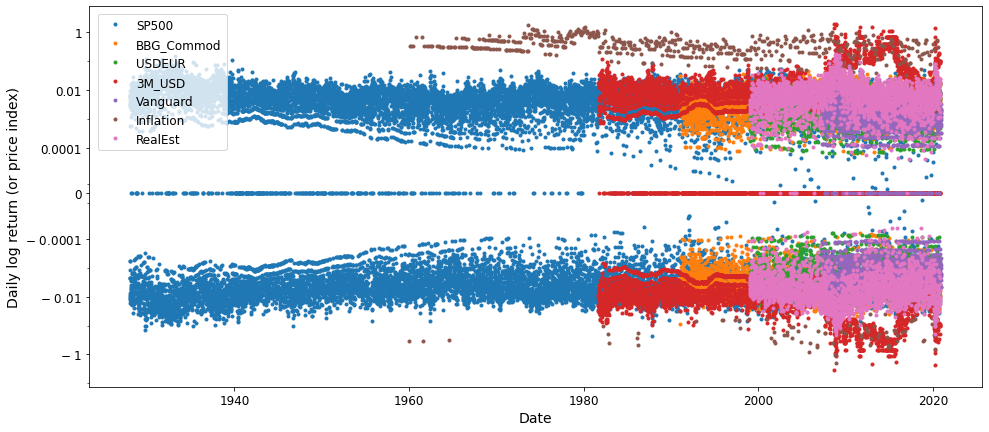

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from numbers import Number

FONTSIZE = 14
FONTSIZE_LEGEND = 12
DISPLAY_MARGIN_RATIO = 5
YTIC_VALUES = [1, 1e-2, 1e-4, 0, -1e-4, -1e-2, -1]


def df_numbers_min_pos_max_neg(df):
    """The smallest positive and the highest negative number from the provided dataframe"""
    assert isinstance(df, pd.DataFrame), 'Input has to be a dataframe'
    
    min_pos = None  # lowest positive value
    max_neg = None  # highest negative value
    for _, column_values in df.iteritems():
        column_values_positive = [x for x in column_values if isinstance(x, Number) and x > 0.0]
        column_values_negative = [x for x in column_values if isinstance(x, Number) and x < 0.0]
        if len(column_values_positive) > 0:
            min_pos = min(column_values_positive) if min_pos is None else min(min(column_values_positive), min_pos)
        if len(column_values_negative) > 0:
            max_neg = max(column_values_negative) if max_neg is None else max(max(column_values_negative), max_neg)
        
    return min_pos, max_neg


def plot_selected_data_symlog_y(df=None, ytic_values=[]):
    """Plot the selected financial data sets with symmetric log y axis"""
    if df is not None:
        min_pos, max_neg = df_numbers_min_pos_max_neg(df)
        
        for data_set_name in df.columns:
            normalization = 0.01 if data_set_name == 'US Consumer Price Index' else 1.0
            plt.plot(normalization * df[data_set_name], lw=0, marker='.', label=data_set_name)
        plt.yscale('symlog', linthresh=max(-max_neg, min_pos) * DISPLAY_MARGIN_RATIO)
        plt.xlabel('Date', fontsize=FONTSIZE)
        plt.ylabel('Daily log return (or price index)', fontsize=FONTSIZE)
        plt.yticks(ytic_values, [str(y).replace('-', '$-\ $') for y in ytic_values])
        plt.legend(bbox_to_anchor=(0.01, .98), loc=2, borderaxespad=0., fontsize=FONTSIZE_LEGEND)
        
        fig = plt.gcf()
        fig.set_size_inches([16, 7])
        plt.show()


plot_selected_data_symlog_y(df_all, ytic_values=YTIC_VALUES)

###### Correlation matrix of the daily (monthly) data sets

* Explain values: group by magnitude the correlation values
* Note: the correlation matrix is symmetric

In [29]:
import pandas as pd


def correlation_matrix_remove_selected_columns_row(df=None, remove_labels=None):

    df_copy = df.copy()
    for remove_label in remove_labels:
        del df_copy[remove_label]
    df_corr = df_copy.corr().round(3)

    return df_corr

    
print('\nCorrelation matrix of daily values.\nInflation and real estate have monthly values.')
df_corr_daily = correlation_matrix_remove_selected_columns_row(df=df_all, remove_labels=['Inflation', 'RealEst'])
display(df_corr_daily)


Correlation matrix of daily values.
Inflation and real estate have monthly values.


,SP500,BBG_Commod,USDEUR,3M_USD,Vanguard
SP500,1.000,0.218,0.048,0.056,-0.102
BBG_Commod,0.218,1.000,0.271,0.021,-0.023
USDEUR,0.048,0.271,1.000,0.025,0.076
3M_USD,0.056,0.021,0.025,1.000,-0.026
Vanguard,-0.102,-0.023,0.076,-0.026,1.000


### Aggregate the indexes yearly

###### Aggregate the data


In [25]:
import pandas as pd


def aggregate_indexes_yearly(df_all=None):
    """Aggregate daily log returns (or monthly price index values) to yearly values.

       For all data sets other than inflation (price index): 
       - account for nans by scaling up with sqrt of time,
       - it is assumed that for each calendar there is a value (either a known value or a nan)."""

    df_all_yearly = pd.DataFrame()
    df_current_yearly = pd.DataFrame()
    for data_set_name in df_all.columns:
        years = df_all[data_set_name].index.year
        if data_set_name == 'Inflation':
            df_current_yearly = pd.DataFrame(df_all[data_set_name].groupby(years).agg('mean'))
        else:
            sum_of_values = df_all[data_set_name].groupby(years).agg('sum')
            number_of_known_values = df_all[data_set_name].groupby(years).agg('count')
            number_of_nans = df_all[data_set_name].isnull().groupby(years).agg('sum').astype(int)
            df_current_yearly = pd.DataFrame(np.sqrt(1.0 + number_of_nans / number_of_known_values) * sum_of_values)

        df_current_yearly.columns = [data_set_name]
        df_all_yearly = (df_current_yearly.copy() if len(df_all_yearly.columns) == 0 
                         else pd.concat([df_all_yearly, df_current_yearly], axis=1))

    df_all_yearly.dropna(how='all', inplace=True)
    return df_all_yearly


df_all_yearly = aggregate_indexes_yearly(df_all=df_all)
display(df_all_yearly.round(3))

,SP500,BBG_Commod,USDEUR,3M_USD,Vanguard,Inflation,RealEst
1928,0.321,NaN,NaN,NaN,NaN,NaN,NaN
1929,-0.127,NaN,NaN,NaN,NaN,NaN,NaN
1930,-0.335,NaN,NaN,NaN,NaN,NaN,NaN
1931,-0.636,NaN,NaN,NaN,NaN,NaN,NaN
1932,-0.160,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2016,0.093,0.110,0.009,0.660,0.000,0.171,-0.007
2017,0.182,0.008,0.116,0.843,0.010,0.174,-0.010
2018,-0.066,-0.143,-0.038,0.472,-0.030,0.158,-0.128
2019,0.260,0.054,-0.004,-0.508,0.058,0.189,0.249


###### Plot the aggregated data

<span style='color:red;background-color:yellow;font-weight:bold;'>+ plot some with semi-transparent bars, some with lines, some with symbols only</span>

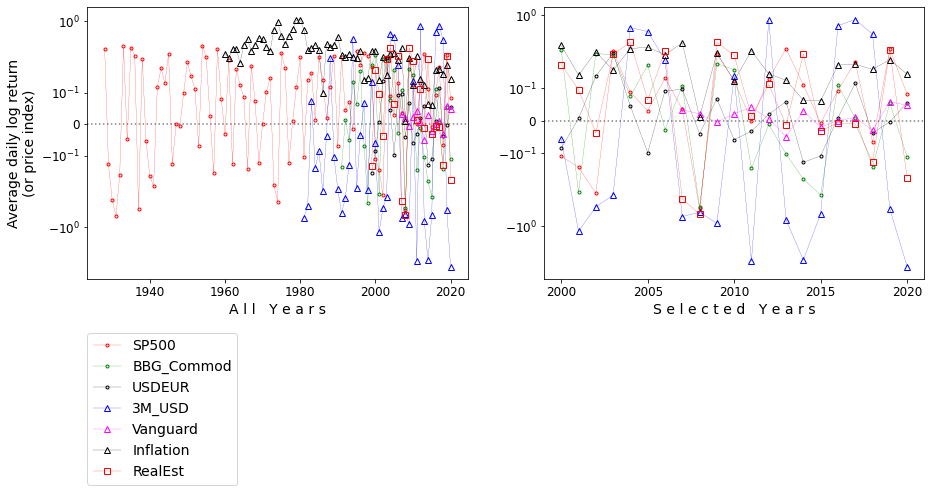

In [48]:
import matplotlib.pyplot as plt

FONTSIZE = 14
TICKS_FONTSIZE = 12
DISPLAY_MARGIN_RATIO = 5
YTIC_VALUES = [1, 0.1, 0, -0.1, -1]
LINTHRESH_Y = 0.2
SELECTED_YEARS_TICKS = [2000, 2005, 2010, 2015, 2020]
COLORS  = 'r', 'g', 'k', 'b', 'magenta', 'k', 'r'
SYMBOLS = '.', '.', '.', '^', '^', '^', 's'
LINEWIDTH = 0.2


def plot_yearly_aggregated_data_symlog_y(df_all_yearly=None, ytic_values=[]):

    if df_all_yearly is not None:
        fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
        for xtick_ytick in ['xtick', 'ytick']:
            plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

        # all years
        ax = axes[0]
        ax.set_xlabel('A l l   Y e a r s', fontsize=FONTSIZE)
        ax.set_ylabel('Average daily log return\n(or price index)', fontsize=FONTSIZE)
        ax.set_yticks(ytic_values)
        ax.set_yticklabels([str(y).replace('-', '$-\ $') for y in ytic_values])
        ax.axhline(0, c='gray', ls='dotted')
        for data_set_name, color, symbol in zip(df_all_yearly.columns, COLORS, SYMBOLS):
            ax.set_yscale('symlog', linthresh=LINTHRESH_Y)
            ax.plot(df_all_yearly[data_set_name], marker=symbol, linewidth=LINEWIDTH, color=color,
                    markerfacecolor='none', markeredgecolor=color, label=data_set_name)
            ax.legend(bbox_to_anchor=(0, -0.2), loc=2, borderaxespad=0, fontsize=FONTSIZE)

        # selected years
        df_all_yearly_sel = df_all_yearly[SELECTED_YEARS_TICKS[0] <= df_all_yearly.index]
        ax = axes[1]
        ax.set_xticks(SELECTED_YEARS_TICKS)
        ax.set_xlabel('S e l e c t e d   Y e a r s', fontsize=FONTSIZE)
        ax.axhline(0, c='gray', ls='dotted')
        for data_set_name, color, symbol in zip(df_all_yearly.columns, COLORS, SYMBOLS):
            ax.set_yscale('symlog', linthresh=LINTHRESH_Y)
            ax.plot(df_all_yearly_sel[data_set_name], marker=symbol, linewidth=LINEWIDTH, color=color,
                    markerfacecolor='none', markeredgecolor=color)
            
        plt.show()


plot_yearly_aggregated_data_symlog_y(df_all_yearly=df_all_yearly, ytic_values=YTIC_VALUES)

###### Correlation matrix of the yearly aggregated data

In [33]:
df_all_yearly_corr = df_all_yearly.corr()
print('\nCorrelation matrix using all data points (already displayed above, shown here for comparison only).')
display(df_corr_daily.round(2))
print('\nCorrelation matrix using yearly aggregated data.')
display(df_all_yearly_corr.round(2))


Correlation matrix using all data points (already displayed above, shown here for comparison only).


,SP500,BBG_Commod,USDEUR,3M_USD,Vanguard
SP500,1.00,0.22,0.05,0.06,-0.10
BBG_Commod,0.22,1.00,0.27,0.02,-0.02
USDEUR,0.05,0.27,1.00,0.02,0.08
3M_USD,0.06,0.02,0.02,1.00,-0.03
Vanguard,-0.10,-0.02,0.08,-0.03,1.00



Correlation matrix using yearly aggregated data.


,SP500,BBG_Commod,USDEUR,3M_USD,Vanguard,Inflation,RealEst
SP500,1.00,0.26,0.18,0.09,-0.06,-0.19,0.59
BBG_Commod,0.26,1.00,0.25,0.34,0.11,0.67,0.46
USDEUR,0.18,0.25,1.00,0.10,-0.01,0.10,0.10
3M_USD,0.09,0.34,0.10,1.00,-0.47,0.17,0.11
Vanguard,-0.06,0.11,-0.01,-0.47,1.00,0.24,-0.01
Inflation,-0.19,0.67,0.10,0.17,0.24,1.00,0.19
RealEst,0.59,0.46,0.10,0.11,-0.01,0.19,1.00


### Correlation depends on aggregation length
#### Task: Observe changes and try to explain


In [42]:
diff_abs = (df_all_yearly_corr - df_corr_daily).dropna(how='all').dropna(how='all', axis=1)
print('\nDifference:  Correlation of yearly aggregated values  -  Correlation of daily values')
display(diff_abs.round(2))


Difference:  Correlation of yearly aggregated values  -  Correlation of daily values


,3M_USD,BBG_Commod,SP500,USDEUR,Vanguard
3M_USD,0.00,0.31,0.04,0.07,-0.45
BBG_Commod,0.31,0.00,0.04,-0.02,0.14
SP500,0.04,0.04,0.00,0.13,0.04
USDEUR,0.07,-0.02,0.13,0.00,-0.09
Vanguard,-0.45,0.14,0.04,-0.09,0.00


<span style='color:red;background-color:yellow;font-weight:bold;'>+ display on each plot the correlation values, the tables are not enough</span>

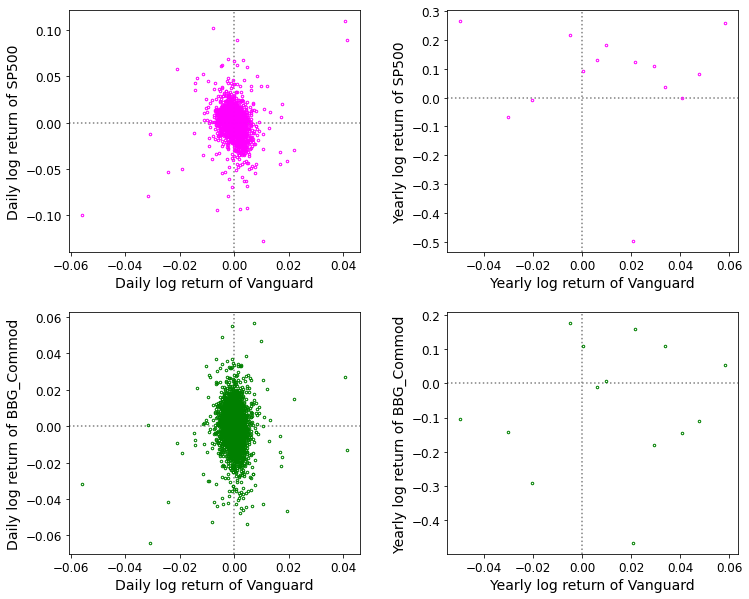

In [50]:
import matplotlib.pyplot as plt

FONTSIZE = 14
MARKERSIZE = 5
PAIRS = {'change': ['Vanguard', 'SP500'], 'const': ['Vanguard', 'BBG_Commod']}
WSPACE_REL_SUBPLOTS = 0.3
HSPACE_REL_SUBPLOTS = 0.25


def plot_scatter_plots_corr_agg(df_all=None, df_all_yearly=None, pairs=None):
    """Scatter plot of data for two pairs, both before and after data aggregation
       - the pair called 'change': pair of indexes for which the correlation changes after data aggregation
       - the pair called 'const': no significant change of correlation after data is aggregated"""

    if df_all is not None and df_all_yearly is not None and pairs is not None:
        fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
        for xtick_ytick in ['xtick', 'ytick']:
            plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

        for which_pair, row, color, symbol in zip(['change', 'const'], [0, 1], ['magenta', 'green'], ['.', '.']):
            name_A, name_B = pairs[which_pair]
            # correlation of all data points
            ax = axes[row][0]
            ax.set_xlabel('Daily log return of {}'.format(name_A), fontsize=FONTSIZE)
            ax.set_ylabel('Daily log return of {}'.format(name_B), fontsize=FONTSIZE)
            ax.axhline(0, c='gray', ls='dotted')
            ax.axvline(0, c='gray', ls='dotted')
            ax.plot(df_all[name_A], df_all[name_B], marker='.', linewidth=0.0,
                    markerfacecolor='none', markeredgecolor=color, markersize=MARKERSIZE)
            # correlation of aggregated data points
            ax = axes[row][1]
            ax.set_xlabel('Yearly log return of {}'.format(name_A), fontsize=FONTSIZE)
            ax.set_ylabel('Yearly log return of {}'.format(name_B), fontsize=FONTSIZE)
            ax.axhline(0, c='gray', ls='dotted')
            ax.axvline(0, c='gray', ls='dotted')
            ax.plot(df_all_yearly[name_A], df_all_yearly[name_B], marker='.', linewidth=0.0,
                    markerfacecolor='none', markeredgecolor=color, markersize=MARKERSIZE)
        
        plt.subplots_adjust(wspace=WSPACE_REL_SUBPLOTS, hspace=HSPACE_REL_SUBPLOTS)
        plt.show()


plot_scatter_plots_corr_agg(df_all=df_all, df_all_yearly=df_all_yearly, pairs=PAIRS)

### Autocorrelation (in time) of asset class indexes
<span style='color:red;background-color:yellow;font-weight:bold;'>+ corr time w daily points or yearly agg</span>

## Derivatives

Please note that the word "derivative" has a different meaning in mathematics and finance.

* Each of the above asset classes does have its own derivatives.

* Moreover, derivatives also often combine different asset classes. 

### Exchange Traded Funds (ETFs) 

Please watch the video on this page and let's talk about it together:<br/>
https://www.investopedia.com/terms/e/etf.asp

### Constructing financial products with Derivatives

Futures, Forwards, Options, Swaps, ...

Put-Call parity

Greeks

Hedging with derivatives

Straddle, Strangle

ETFs

## Recommended reading

https://www.investopedia.com --> Equity, Commodity, Credit, FX, Derivatives